In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=50, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=21, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
#     parser.add_argument("--seed", metavar="i", type=int, default=17, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=131, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
# debug_mode = True
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene(7)
rearrangement1 = Rearrange1('panda', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9018 --control=9016 --hb=9015 --Session.signature_scheme="hmac-sha256" --Session.key=b"3d52babc-e575-49eb-b9d7-42164f3df429" --shell=9017 --transport="tcp" --iopub=9019 --f=/home/juju/.local/share/jupyter/runtime/kernel-v2-3071ers4C5RNGwKp.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('bottle0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('Candle0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('Canister0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[ 0.37171298 -0.46096302  0.83529998]),
                           Object(name=bottle0, pos=[ 0.51193143 -0.31601679  0.86867161]),
                          

In [2]:
def get_final_all_values(algo, budgets, n_seed, obj_num, flag = 2,  end_num=0):
    result_all_values = {}
    
    perturb_final_level_1_values = []
    perturb_final_level_2_values = []
    perturb_final_pnp_all_joint_paths = []
    perturb_final_pick_all_objects = []
    perturb_final_place_all_object_poses = []

    ###
    perturb_final_used_time = []
    perturb_final_visited_node_num = [] 
    perturb_final_visited_node_num_each_depth = []

    c_list = []
    for seed in range(1, n_seed+1):
        filename = f'/home/juju/Downloads/benchmark0_rearr_test_algo(bai_ucb)_budget(100)_seed(2)_obj(6)_flag(2)_0.npy'
        with open(filename,'rb') as f:
            data_for_seed = np.load(f, allow_pickle=True)
            perturb_final_level_1_values.append(data_for_seed['level_1_values'])
            perturb_final_level_2_values.append(data_for_seed['level_2_values'])
            perturb_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])
            perturb_final_pick_all_objects.append(data_for_seed['pick_all_objects'])
            perturb_final_place_all_object_poses.append(data_for_seed['place_all_object_poses'])
            perturb_final_used_time.append(data_for_seed['final_used_time'])
            perturb_final_visited_node_num.append(data_for_seed['final_visited_node_num'])
            perturb_final_visited_node_num_each_depth.append(data_for_seed['final_visited_node_num_each_node'])

            obj_num_ = data_for_seed['used_obj_num']
            c_list = data_for_seed['c']

    
    perturb_final_level_1_values = np.asarray(perturb_final_level_1_values)
    perturb_final_level_2_values = np.asarray(perturb_final_level_2_values)
    perturb_final_level_2_values[np.isinf(perturb_final_level_2_values)]=0.
    
    result_all_values["level_1_values"] = perturb_final_level_1_values
    result_all_values["level_2_values"] = perturb_final_level_2_values
    result_all_values["pnp_all_joint_paths"] = perturb_final_pnp_all_joint_paths
    result_all_values["pick_all_objects"] = perturb_final_pick_all_objects
    result_all_values["place_all_object_poses"] = perturb_final_place_all_object_poses
    result_all_values["used_time"] = perturb_final_used_time
    result_all_values["visted_node_num"] = perturb_final_visited_node_num
    result_all_values["visted_node_num_each_depth"] = perturb_final_visited_node_num_each_depth
    result_all_values["c"] = c_list

    return result_all_values 

In [3]:
# bai_ucb_result_all_values_flag_2 = get_final_all_values("bai_perturb", 100, 1 ,4, 2, 0)


In [4]:
bai_perturb_result_all_values_flag_2['visted_node_num']

NameError: name 'bai_perturb_result_all_values_flag_2' is not defined

In [ ]:
# rearrangement1.scene_mngr.scene.objs['ben_cube0'].h_mat  =  list(mcts.rearr_action.get_arbitrary_location('ben_cube0', support_obj_name='ben_cube_support',scene_for_sample=mcts.init_scene, sample_num= 1))[0]['ben_cube_support']

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.37171298 -0.46096302  0.83529998]), 'bottle0': Object(name=bottle0, pos=[ 0.51193143 -0.31601679  0.86867161]), 'can0': Object(name=can0, pos=[0.38817409 0.10798271 0.84656699]), 'milk0': Object(name=milk0, pos=[0.61059896 0.09810603 0.87131598]), 'cereal0': Object(name=cereal0, pos=[ 0.42085024 -0.22345617  0.87776569]), 'Candle0': Object(name=Candle0, pos=[0.49933294 0.10422713 0.81030546]), 'Canister0': Object(name=Canister0, pos=[ 0.63468729 -0.32210197  0.97859782])}
{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.50546316 -0.0043844   0.83529998]), 'bottle0': Object(name=bottle0, pos=[ 0.40335961 -0.11785836  0.86867161]), 'can0': Object(name=can0, pos=[ 0.45976065 -0.32989166  0.84656699]), 'milk0': Object(name=milk0, pos=[ 0.34736622 -0.21981586  0.87131598]), 'cereal0': Object(name=cereal0, pos=[0.46400811 0.08217708 0.8777

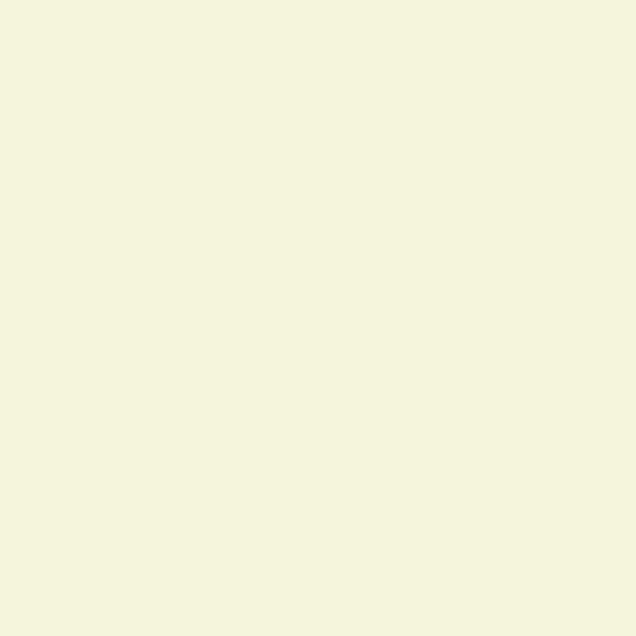

In [2]:
# #######################
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
# init_scene
rearrangement1.scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.scene_mngr)
rearrangement1.scene_mngr.show()

# goal_scene
rearrangement1.goal_scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.goal_scene_mngr)
rearrangement1.goal_scene_mngr.show()

In [2]:
c = 3.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=False,
        use_pick_action=False,
        consider_next_scene=True, 
    )
mcts.only_optimize_1 = False
mcts._do_level_2 = True

2023-08-15 19:39:05.918310: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-08-15 19:39:05.968564: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-15 19:39:05.968670: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-15 19:39:05.968694: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-08-15 19:39:05.970750: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-15 19:39:05.970800: I tensorflow/stream_executor/plat

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling
<module 'contact_graspnet.contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` i

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2023-08-15 19:39:08.091299: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-15 19:39:08.091904: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-15 19:39:08.091971: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-15 19:39:08.092012: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), 

INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-08-15 19:39:08.347827: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-08-15 19:39:08.347845: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-08-15 19:39:08.347849: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-08-15 19:39:08.347972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-15 19:39:08.348078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-15 19:39:08.348130: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

In [3]:
start_time = time.time()
for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 3.5, Seed: 131
=========== Search iteration : 1 ===========
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(0) -> A(6) -> S'(12) Reward : 5.0
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(12) -> A(20) -> S'(22) Reward : -1
[Action] Rearr Canister0 to table
Good Action
[Reward] S(22) -> A(25) -> S'(30) Reward : 1.667
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(30) -> A(37) -> S'(39) Reward : -1
[Action] Rearr Canister0 to table
Bad Action
[Reward] S(39) -> A(42) -> S'(47) Reward : -1.0
[Action] Rearr bottle0 to table
Good Action
[Reward] S(47) -> A(52) -> S'(55) Reward : 0.833
[Action] Rearr cereal0 to table
Good Action
[Reward] S(55) -> A(64) -> S'(65) Reward : 0.714
[Action] Rearr Candle0 to table
placed another place not goal
[Reward] S(65) -> A(66) -> S'(72) Reward : -1
[Action] Rearr milk0 to table
Good Action
[Reward] S(72) -> A(78) -> S'(80) Reward : 0.556
[Action] Rearr C

[Action] Rearr Candle0 to table
placed another place not goal
[Reward] S(400) -> A(401) -> S'(409) Reward : -1
[Action] Rearr cereal0 to table
Bad Action
[Reward] S(409) -> A(414) -> S'(415) Reward : -0.385
[Action] Rearr milk0 to table
Good Action
[Reward] S(415) -> A(423) -> S'(424) Reward : 0.357
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(424) -> A(429) -> S'(431) Reward : -1
[Action] Rearr Candle0 to table
Good Action
[Reward] S(431) -> A(433) -> S'(439) Reward : 0.312
[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(439) -> A(442) -> S'(447) Reward : -0.294
[Action] Rearr Canister0 to table
Good Action
[Reward] S(447) -> A(448) -> S'(451) Reward : 0.278
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(451) -> A(456) -> S'(458) Reward : -1
[Action] Rearr bottle0 to table
Bad Action
[Reward] S(458) -> A(463) -> S'(464) Reward : -0.25
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(464) -> A(466) 

[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(818) -> A(821) -> S'(826) Reward : -1
Exceeded the maximum depth!!
last max  value level 1 : 1.7402965498553722
########### Running time :  14.295479774475098 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3.5, Seed: 131
=========== Search iteration : 6 ===========
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(0) -> A(5) -> S'(827) Reward : -1
[Action] Rearr Canister0 to table
Good Action
[Reward] S(827) -> A(831) -> S'(837) Reward : 2.5
[Action] Rearr bottle0 to table
Good Action
[Reward] S(837) -> A(843) -> S'(846) Reward : 1.667
[Action] Rearr Candle0 to table
Good Action
[Reward] S(846) -> A(848) -> S'(856) Reward : 1.25
[Action] Rearr cereal0 to table
Good Action
[Reward] S(856) -> A(863) -> S'(864) Reward : 1.0
[Action] Rearr milk0 to table
Good Action
[Reward] S(864) -> A(871) -> S'(872) Reward : 0.833
[Action] Rearr cereal0 to table
Bad Action
[Reward] S(872) -> A

[Action] Rearr milk0 to table
Good Action
[Reward] S(1226) -> A(1231) -> S'(1232) Reward : 0.556
[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(1232) -> A(1236) -> S'(1241) Reward : -0.5
[Action] Rearr Canister0 to table
Good Action
[Reward] S(1241) -> A(1243) -> S'(1249) Reward : 0.455
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(1249) -> A(1252) -> S'(1258) Reward : 0.417
[Action] Rearr cereal0 to table
Good Action
[Reward] S(1258) -> A(1265) -> S'(1266) Reward : 0.385
[Action] Rearr Canister0 to table
Bad Action
[Reward] S(1266) -> A(1267) -> S'(1272) Reward : -0.357
[Action] Rearr milk0 to table
Bad Action
[Reward] S(1272) -> A(1276) -> S'(1277) Reward : -0.333
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(1277) -> A(1281) -> S'(1284) Reward : -1
[Action] Rearr Canister0 to table
Good Action
[Reward] S(1284) -> A(1287) -> S'(1291) Reward : 0.294
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(1291) -> A(1293) 

2023-08-15 19:39:33.464312: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-08-15 19:39:33.797517: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-08-15 19:39:34.324215: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-15 19:39:34.608989: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


Generated 7 grasps for object bottle0
solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0085 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0043 sec

solve with LM1
Iterators : 6
WorkingTime[inverse_kinematics]: 0.0030 sec

milk0
Extracted Region Cube Size:  0.4
Generated 9 grasps for object milk0
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0045 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

cereal0
Extracted Region Cube Size:  0.4
Random sample points 
Generated 30 grasps for object cereal0
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0050 sec

collision !!! 
solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0034 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0017 sec

bottle0
Extracted Region Cub

[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(1334) -> A(1340) -> S'(1344) Reward : 1.25
[Action] Rearr milk0 to table
placed another place not goal
[Reward] S(1344) -> A(1351) -> S'(1353) Reward : -1
[Action] Rearr bottle0 to table
Good Action
[Reward] S(1353) -> A(1360) -> S'(1362) Reward : 0.833
[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(1362) -> A(1367) -> S'(1371) Reward : -0.714
[Action] Rearr Canister0 to table
Good Action
[Reward] S(1371) -> A(1375) -> S'(1379) Reward : 0.625
[Action] Rearr Candle0 to table
placed another place not goal
[Reward] S(1379) -> A(1380) -> S'(1386) Reward : -1
[Action] Rearr milk0 to table
Good Action
[Reward] S(1386) -> A(1391) -> S'(1392) Reward : 0.5
[Action] Rearr Canister0 to table
Bad Action
[Reward] S(1392) -> A(1394) -> S'(1398) Reward : -0.455
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(1398) -> A(1402) -> S'(1406) Reward : 0.417
[Action] Rearr Canister0 to table
placed another place not goal
[Reward] S(1

Generated 49 grasps for object bottle0
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0050 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

Canister0
Extracted Region Cube Size:  0.4
Generated 41 grasps for object Canister0
solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0090 sec

solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0036 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0040 sec

Candle0
Extracted Region Cube Size:  0.4
Generated 44 grasps for object Candle0
solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0069 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0022 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0017 sec

Canister0
Extracted Region Cube Size:  0.4
Generated 99 grasps for object Canister0
solve with LM1
Iterators : 12
WorkingTime[in

[Action] Rearr milk0 to table
Good Action
[Reward] S(1797) -> A(1803) -> S'(1806) Reward : 0.25
[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(1806) -> A(1810) -> S'(1815) Reward : -0.238
Exceeded the maximum depth!!
last max  value level 1 : 1.7402965498553722
########### Running time :  47.39410662651062 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3.5, Seed: 131
=========== Search iteration : 12 ===========
[Action] Rearr milk0 to table
placed another place not goal
[Reward] S(0) -> A(9) -> S'(1313) Reward : -1
[Action] Rearr Candle0 to table
placed another place not goal
[Reward] S(1313) -> A(1314) -> S'(1816) Reward : -1
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(1816) -> A(1824) -> S'(1826) Reward : -1
[Action] Rearr Canister0 to table
placed another place not goal
[Reward] S(1826) -> A(1828) -> S'(1835) Reward : -1
[Action] Rearr cereal0 to table
Good Action
[Reward] S(1835) -> A(1844) -> S'(1845) Reward : 1.0
[Action] Rearr b

[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(2136) -> A(2139) -> S'(2144) Reward : -0.833
[Action] Rearr Candle0 to table
placed another place not goal
[Reward] S(2144) -> A(2145) -> S'(2153) Reward : -1
[Action] Rearr cereal0 to table
Good Action
[Reward] S(2153) -> A(2161) -> S'(2162) Reward : 0.625
[Action] Rearr Candle0 to table
Good Action
[Reward] S(2162) -> A(2164) -> S'(2172) Reward : 0.556
[Action] Rearr Canister0 to table
Good Action
[Reward] S(2172) -> A(2174) -> S'(2181) Reward : 0.5
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(2181) -> A(2183) -> S'(2188) Reward : -1
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(2188) -> A(2190) -> S'(2194) Reward : -1
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(2194) -> A(2198) -> S'(2202) Reward : 0.385
[Action] Rearr milk0 to table
Good Action
[Reward] S(2202) -> A(2206) -> S'(2208) Reward : 0.357
[Action] Rearr cereal0 to table
Bad Action
[Reward] S(2208) 

[Action] Rearr bottle0 to table
Good Action
[Reward] S(2521) -> A(2526) -> S'(2529) Reward : 0.333
[Action] Rearr Canister0 to table
placed another place not goal
[Reward] S(2529) -> A(2532) -> S'(2539) Reward : -1
[Action] Rearr cereal0 to table
Bad Action
[Reward] S(2539) -> A(2546) -> S'(2547) Reward : -0.294
[Action] Rearr bottle0 to table
Bad Action
[Reward] S(2547) -> A(2552) -> S'(2555) Reward : -0.278
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(2555) -> A(2560) -> S'(2565) Reward : -1
[Action] Rearr Canister0 to table
placed another place not goal
[Reward] S(2565) -> A(2568) -> S'(2576) Reward : -1
[Action] Rearr bottle0 to table
Good Action
[Reward] S(2576) -> A(2582) -> S'(2587) Reward : 0.238
Exceeded the maximum depth!!
last max  value level 1 : 1.7402965498553722
########### Running time :  61.47703504562378 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3.5, Seed: 131
=========== Search iteration : 17 ===========
[Action] Rearr b

[Action] Rearr milk0 to table
placed another place not goal
[Reward] S(2911) -> A(2919) -> S'(2920) Reward : -1
[Action] Rearr Candle0 to table
Good Action
[Reward] S(2920) -> A(2922) -> S'(2930) Reward : 1.0
[Action] Rearr Canister0 to table
Good Action
[Reward] S(2930) -> A(2932) -> S'(2938) Reward : 0.833
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(2938) -> A(2941) -> S'(2943) Reward : -1
[Action] Rearr cereal0 to table
Bad Action
[Reward] S(2943) -> A(2950) -> S'(2951) Reward : -0.625
[Action] Rearr Canister0 to table
Bad Action
[Reward] S(2951) -> A(2953) -> S'(2960) Reward : -0.556
[Action] Rearr milk0 to table
Good Action
[Reward] S(2960) -> A(2966) -> S'(2969) Reward : 0.5
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(2969) -> A(2972) -> S'(2976) Reward : -1
[Action] Rearr cereal0 to table
Good Action
[Reward] S(2976) -> A(2984) -> S'(2985) Reward : 0.417
[Action] Rearr ben_cube0 to table
placed another place not goal
[Rew

failed to generate grasp pose for ben_cube0
Extracted Region Cube Size:  0.4
failed to generate grasp pose for ben_cube0
Extracted Region Cube Size:  0.4
failed to generate grasp pose for ben_cube0
bottle0
Extracted Region Cube Size:  0.4
Generated 46 grasps for object bottle0
solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0054 sec

solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0036 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

Candle0
Extracted Region Cube Size:  0.4
Random sample points 
Generated 14 grasps for object Candle0
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0064 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

This optimal subnodes([0, 5, 827, 832, 3060, 3064, 3071, 3078, 3081, 3082, 3091, 3099, 3100, 3105, 3108, 3110, 3115, 3117, 3121, 3122, 3128, 3130, 3135, 3140, 3143, 3145, 315

[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(3479) -> A(3485) -> S'(3490) Reward : 1.25
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(3490) -> A(3494) -> S'(3500) Reward : -1
[Action] Rearr milk0 to table
Good Action
[Reward] S(3500) -> A(3507) -> S'(3510) Reward : 0.833
[Action] Rearr Canister0 to table
placed another place not goal
[Reward] S(3510) -> A(3513) -> S'(3520) Reward : -1
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(3520) -> A(3524) -> S'(3529) Reward : -1
[Action] Rearr Canister0 to table
placed another place not goal
[Reward] S(3529) -> A(3532) -> S'(3538) Reward : -1
[Action] Rearr Candle0 to table
Good Action
[Reward] S(3538) -> A(3540) -> S'(3543) Reward : 0.5
[Action] Rearr Canister0 to table
Good Action
[Reward] S(3543) -> A(3544) -> S'(3551) Reward : 0.455
[Action] Rearr cereal0 to table
Good Action
[Reward] S(3551) -> A(3557) -> S'(3558) Reward : 0.417
[Action] Rearr milk0 to table
Bad Action
[Rewa

[Action] Rearr Canister0 to table
placed another place not goal
[Reward] S(3845) -> A(3847) -> S'(3853) Reward : -1
[Action] Rearr cereal0 to table
Bad Action
[Reward] S(3853) -> A(3859) -> S'(3860) Reward : -0.357
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(3860) -> A(3865) -> S'(3867) Reward : -1
[Action] Rearr Canister0 to table
placed another place not goal
[Reward] S(3867) -> A(3868) -> S'(3874) Reward : -1
[Action] Rearr cereal0 to table
Good Action
[Reward] S(3874) -> A(3881) -> S'(3882) Reward : 0.294
[Action] Rearr Candle0 to table
Bad Action
[Reward] S(3882) -> A(3883) -> S'(3890) Reward : -0.278
[Action] Rearr milk0 to table
Bad Action
[Reward] S(3890) -> A(3896) -> S'(3898) Reward : -0.263
[Action] Rearr bottle0 to table
Good Action
[Reward] S(3898) -> A(3905) -> S'(3907) Reward : 0.25
[Action] Rearr Candle0 to table
placed another place not goal
[Reward] S(3907) -> A(3908) -> S'(3915) Reward : -1
Exceeded the maximum depth!!
last max  value lev

[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(4228) -> A(4232) -> S'(4239) Reward : 1.0
[Action] Rearr Candle0 to table
Good Action
[Reward] S(4239) -> A(4241) -> S'(4249) Reward : 0.833
[Action] Rearr bottle0 to table
Good Action
[Reward] S(4249) -> A(4252) -> S'(4256) Reward : 0.714
[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(4256) -> A(4259) -> S'(4262) Reward : -0.625
[Action] Rearr cereal0 to table
Good Action
[Reward] S(4262) -> A(4267) -> S'(4268) Reward : 0.556
[Action] Rearr Canister0 to table
Bad Action
[Reward] S(4268) -> A(4270) -> S'(4276) Reward : -0.5
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(4276) -> A(4278) -> S'(4282) Reward : 0.455
[Action] Rearr Canister0 to table
placed another place not goal
[Reward] S(4282) -> A(4283) -> S'(4288) Reward : -1
[Action] Rearr milk0 to table
placed another place not goal
[Reward] S(4288) -> A(4292) -> S'(4294) Reward : -1
[Action] Rearr Candle0 to table
Bad Action
[Reward] S(4294) -> A(4295) -> S

[Action] Rearr Candle0 to table
placed another place not goal
[Reward] S(4582) -> A(4583) -> S'(4589) Reward : -1
[Action] Rearr bottle0 to table
Good Action
[Reward] S(4589) -> A(4593) -> S'(4597) Reward : 0.333
[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(4597) -> A(4600) -> S'(4604) Reward : -0.312
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(4604) -> A(4610) -> S'(4612) Reward : -1
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(4612) -> A(4615) -> S'(4619) Reward : -1
[Action] Rearr bottle0 to table
Bad Action
[Reward] S(4619) -> A(4623) -> S'(4627) Reward : -0.263
[Action] Rearr milk0 to table
Bad Action
[Reward] S(4627) -> A(4632) -> S'(4634) Reward : -0.25
[Action] Rearr bottle0 to table
Good Action
[Reward] S(4634) -> A(4641) -> S'(4644) Reward : 0.238
Exceeded the maximum depth!!
last max  value level 1 : 1.7402965498553722
########### Running time :  102.90223336219788 ##############

[1/10] Benchmark: 0, Algo

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Generated 30 grasps for object milk0
solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0067 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0022 sec

pick ben_cube0
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0060 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0068 sec

solve with LM1
Iterators : 25
WorkingTime[inverse_kinematics]: 0.0116 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0085 sec

solve with LM1
Iterators : 31
WorkingTime[inverse_kinematics]: 0.0144 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 17 --> 160
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 4.223
WorkingTime[run]: 3.4314 sec

WorkingTime[run]: 0.0474 sec

WorkingTime[run]: 0.0504 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 4.443
WorkingTime[run]: 4.2787 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0058 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.378
WorkingTime[run]: 4.3695 sec

WorkingTime[run]: 0.0521 sec

WorkingTime[run]: 0.0529 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.384
WorkingTime[run]: 3.2776 sec

Success pnp
pick bottle0
solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0092 sec

solve with LM1
Iterators : 25
WorkingTime[inverse_kinematics]: 0.0119 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.348
WorkingTime[run]: 3.2512 sec

WorkingTime[run]: 0.0497 sec

WorkingTime[run]: 0.0512 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.446
WorkingTime[run]: 4.5712 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0076 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.051
WorkingTime[run]: 4.4233 sec

WorkingTime[run]: 0.0523 sec

WorkingTime[run]: 0.0483 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 2.11
WorkingTime[run]: 3.2858 sec

Success pnp
pick milk0
solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0085 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 8 --> 70
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.453
WorkingTime[run]: 3.2140 sec

WorkingTime[run]: 0.0506 sec

WorkingTime[run]: 0.0497 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 3.517
WorkingTime[run]: 4.5260 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0097 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.629
WorkingTime[run]: 4.1732 sec

WorkingTime[run]: 0.0488 sec

WorkingTime[run]: 0.0507 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint li

Cost is 1.723
WorkingTime[run]: 3.3076 sec

Success pnp
pick Candle0
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0066 sec

{('panda_link_7', 'cereal0')}
*********************** Scene ***********************
{'Candle0': Object(name=Candle0, pos=[ 0.47493423 -0.05465901  0.81030546]),
 'Canister0': Object(name=Canister0, pos=[ 0.41315412 -0.27861785  0.97859782]),
 'ben_cube0': Object(name=ben_cube0, pos=[0.30358259 0.52893032 0.83379998]),
 'bottle0': Object(name=bottle0, pos=[0.28626483 0.3561705  0.86717161]),
 'cereal0': Object(name=cereal0, pos=[0.41364893 0.03958458 0.87776569]),
 'milk0': Object(name=milk0, pos=[ 0.34287945 -0.21655067  0.87131598]),
 'table': Object(name=table, pos=[ 0.9   -0.6    0.043])}
panda Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
panda_gripper [[-0.10813997  0.78672668  0.6077556   0.44381845]
 [ 0.08638809  0.61646472 -0.78262913  0.01856845]
 [-0.9903751  -0.03213064 -0.13462829  0.98481417]
 [ 0.          0.          0. 

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


{('panda_link_7', 'cereal0')}
*********************** Scene ***********************
{'Candle0': Object(name=Candle0, pos=[ 0.47493423 -0.05465901  0.81030546]),
 'Canister0': Object(name=Canister0, pos=[ 0.41315412 -0.27861785  0.97859782]),
 'ben_cube0': Object(name=ben_cube0, pos=[0.30358259 0.52893032 0.83379998]),
 'bottle0': Object(name=bottle0, pos=[0.28626483 0.3561705  0.86717161]),
 'cereal0': Object(name=cereal0, pos=[0.41364893 0.03958458 0.87776569]),
 'milk0': Object(name=milk0, pos=[ 0.34287945 -0.21655067  0.87131598]),
 'table': Object(name=table, pos=[ 0.9   -0.6    0.043])}
panda Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
panda_gripper [[-0.10814044  0.78672644  0.60775583  0.44381841]
 [ 0.0863886   0.61646502 -0.78262883  0.01856838]
 [-0.99037501 -0.03213066 -0.13462899  0.98481431]
 [ 0.          0.          0.          1.        ]]
***************************************************************

******************** Robot Collision Info ***************

[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[ERROR] [RRT Star Planner]: Not found IK solution


*********************** Scene ***********************
{'Candle0': Object(name=Candle0, pos=[ 0.47493423 -0.05465901  0.81030546]),
 'Canister0': Object(name=Canister0, pos=[ 0.41315412 -0.27861785  0.97859782]),
 'ben_cube0': Object(name=ben_cube0, pos=[0.30358259 0.52893032 0.83379998]),
 'bottle0': Object(name=bottle0, pos=[0.28626483 0.3561705  0.86717161]),
 'cereal0': Object(name=cereal0, pos=[0.41364893 0.03958458 0.87776569]),
 'milk0': Object(name=milk0, pos=[ 0.34287945 -0.21655067  0.87131598]),
 'table': Object(name=table, pos=[ 0.9   -0.6    0.043])}
panda Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
panda_gripper [[-0.10814007  0.78672669  0.60775557  0.44381845]
 [ 0.08638814  0.6164647  -0.78262913  0.01856845]
 [-0.99037509 -0.0321307  -0.1346284   0.98481419]
 [ 0.          0.          0.          1.        ]]
***************************************************************

******************** Robot Collision Info ********************
panda_link_0 [0.    0.  

[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(4734) -> A(4739) -> S'(4745) Reward : -1
[Action] Rearr milk0 to table
Good Action
[Reward] S(4745) -> A(4753) -> S'(4756) Reward : 1.0
[Action] Rearr cereal0 to table
Good Action
[Reward] S(4756) -> A(4766) -> S'(4767) Reward : 0.833
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(4767) -> A(4773) -> S'(4776) Reward : -1
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(4776) -> A(4781) -> S'(4785) Reward : -1
[Action] Rearr cereal0 to table
Bad Action
[Reward] S(4785) -> A(4793) -> S'(4794) Reward : -0.556
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(4794) -> A(4798) -> S'(4803) Reward : -1
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(4803) -> A(4807) -> S'(4811) Reward : -1
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(4811) -> A(4817) -> S'(4821) Reward : 0.417
[Action] Rearr Canister0 to ta

[Action] Rearr Canister0 to table
Good Action
[Reward] S(5108) -> A(5110) -> S'(5115) Reward : 0.385
##########['cereal0', 'ben_cube0', 'bottle0', 'milk0', 'Candle0', 'Canister0']#############
Success!!!!!
Terminal State! Reward is 5
last max  value level 1 : 4.788367188367188
already has grasp_poses
already has grasp_poses
already has grasp_poses
Candle0
Extracted Region Cube Size:  0.4
Generated 68 grasps for object Candle0
solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0068 sec

collision !!! 
solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0034 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

cereal0
Extracted Region Cube Size:  0.4
Generated 182 grasps for object cereal0
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0049 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0022 sec

solve with LM1
Iterators : 3

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Generated 37 grasps for object Canister0
solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0095 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0044 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0040 sec

Already know path
Already know path
Already know path
pick Candle0
solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0045 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.756
WorkingTime[run]: 3.0885 sec

WorkingTime[run]: 0.0505 sec

WorkingTime[run]: 0.0479 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 1.736
WorkingTime[run]: 4.4293 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0098 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.978
WorkingTime[run]: 4.2327 sec

WorkingTime[run]: 0.0517 sec

WorkingTime[run]: 0.0522 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 3.033
WorkingTime[run]: 3.1758 sec

Success pnp
pick cereal0
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0054 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.351
WorkingTime[run]: 3.2610 sec

WorkingTime[run]: 0.0484 sec

WorkingTime[run]: 0.0487 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.35
WorkingTime[run]: 4.5458 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0052 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.413
WorkingTime[run]: 4.2227 sec

WorkingTime[run]: 0.0524 sec

WorkingTime[run]: 0.0539 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004


Cost is 2.41
WorkingTime[run]: 3.2859 sec

Success pnp
pick ben_cube0
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0050 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.143
WorkingTime[run]: 3.5555 sec

WorkingTime[run]: 0.0500 sec

WorkingTime[run]: 0.0498 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004


Cost is 1.893
WorkingTime[run]: 4.7140 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0085 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000006
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.712
WorkingTime[run]: 4.4868 sec

WorkingTime[run]: 0.0496 sec

WorkingTime[run]: 0.0485 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.096
WorkingTime[run]: 3.2912 sec

Success pnp
pick bottle0
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0075 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.379
WorkingTime[run]: 3.3969 sec

WorkingTime[run]: 0.0469 sec

WorkingTime[run]: 0.0490 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.489
WorkingTime[run]: 4.4725 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0047 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.517
WorkingTime[run]: 4.4240 sec

WorkingTime[run]: 0.0489 sec

WorkingTime[run]: 0.0509 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 1.512
WorkingTime[run]: 3.2840 sec

Success pnp
pick Candle0
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0074 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.303
WorkingTime[run]: 3.4150 sec

WorkingTime[run]: 0.0472 sec

WorkingTime[run]: 0.0469 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.912
WorkingTime[run]: 4.5406 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0065 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0067 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0072 sec

solve with LM1
Iterators : 25
WorkingTime[inverse_kinematics]: 0.0118 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0093 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0061 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0080 sec

solve with LM1
Iterators : 27
WorkingTime[inverse_kinematics]: 0.0123 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0058 sec

solve with LM1
Iterators : 33
WorkingTime[inverse_kinematics]: 0.0150 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 11 --> 100
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.995
WorkingTime[run]: 4.3571 sec

WorkingTime[run]: 0.0483 sec

WorkingTime[run]: 0.0498 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 3.195
WorkingTime[run]: 3.2011 sec

Success pnp
pick milk0
solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0111 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 16 --> 150
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000004
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.964
WorkingTime[run]: 3.2193 sec

WorkingTime[run]: 0.0494 sec

WorkingTime[run]: 0.0519 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.07
WorkingTime[run]: 4.4653 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0062 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.185
WorkingTime[run]: 4.3614 sec

WorkingTime[run]: 0.0523 sec

WorkingTime[run]: 0.0510 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 2.359
WorkingTime[run]: 3.2848 sec

Success pnp
pick Candle0
solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0135 sec



[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Retry Generate Path, the number of retries is 1/5 

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0080 sec

solve with LM1
Iterators : 34
WorkingTime[inverse_kinematics]: 0.0153 sec

solve with LM1
Iterators : 24
WorkingTime[inverse_kinematics]: 0.0109 sec



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.818
WorkingTime[run]: 8.1637 sec

WorkingTime[run]: 0.0477 sec

WorkingTime[run]: 0.0477 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 3.805
WorkingTime[run]: 4.4111 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0100 sec

solve with LM1
Iterators : 28
WorkingTime[inverse_kinematics]: 0.0129 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0042 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0076 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0057 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0083 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0039 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0054 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0076 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0057 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0072 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0048 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinemati

[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.553
WorkingTime[run]: 4.5260 sec

WorkingTime[run]: 0.0546 sec

WorkingTime[run]: 0.0582 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 8 --> 70
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.612
WorkingTime[run]: 3.2670 sec

Success pnp
pick milk0
solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0089 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 7 --> 60
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000003
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000004
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.078
WorkingTime[run]: 3.3779 sec

WorkingTime[run]: 0.0514 sec

WorkingTime[run]: 0.0519 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.996
WorkingTime[run]: 4.6237 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0079 sec



[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Retry Generate Path, the number of retries is 1/5 

solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0107 sec

solve with LM1
Iterators : 25
WorkingTime[inverse_kinematics]: 0.0116 sec



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Retry Generate Path, the number of retries is 2/5 

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0058 sec

solve with LM1
Iterators : 23
WorkingTime[inverse_kinematics]: 0.0106 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0094 sec

solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0101 sec



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004


Retry Generate Path, the number of retries is 3/5 

solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0106 sec



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: iter : 1000
[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.478
WorkingTime[run]: 28.7308 sec

WorkingTime[run]: 0.0500 sec

WorkingTime[run]: 0.0509 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 2.889
WorkingTime[run]: 3.1999 sec

Success pnp
pick Candle0
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0049 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.363
WorkingTime[run]: 3.2835 sec

WorkingTime[run]: 0.0522 sec

WorkingTime[run]: 0.0523 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.234
WorkingTime[run]: 4.5605 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0088 sec

solve with LM1
Iterators : 37
WorkingTime[inverse_kinematics]: 0.0171 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0074 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0066 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0449 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0078 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0088 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0074 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0087 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0091 sec

solve with LM1
Iterators : 27
WorkingTime[inverse_kinematics]: 0.0122 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0059 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0052 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0065 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0038 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 12 --> 110
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.959
WorkingTime[run]: 5.1760 sec

WorkingTime[run]: 0.0551 sec

WorkingTime[run]: 0.0540 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 3.144
WorkingTime[run]: 3.2387 sec

Success pnp
pick Canister0
solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0110 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 10 --> 90
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000003
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000004
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.703
WorkingTime[run]: 3.2232 sec

WorkingTime[run]: 0.0482 sec

WorkingTime[run]: 0.0497 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.923
WorkingTime[run]: 4.5900 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0058 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.249
WorkingTime[run]: 4.2582 sec

WorkingTime[run]: 0.0525 sec

WorkingTime[run]: 0.0511 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30


Cost is 2.53
WorkingTime[run]: 3.1630 sec

Success pnp
History : 5.739557664557665 value_sum : 0.5112
Update Sub optimal Nodes!! Value is 6.250758.
 level 2 value : 6.250758 
History : 5.739557664557665 value_sum : 0.5112
Add level_1_node!
Add level_2_node!
########### Running time :  353.3593375682831 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3.5, Seed: 131
=========== Search iteration : 35 ===========
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(0) -> A(5) -> S'(827) Reward : -1
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(827) -> A(832) -> S'(3060) Reward : -1
[Action] Rearr Canister0 to table
Good Action
[Reward] S(3060) -> A(3064) -> S'(3071) Reward : 1.667
[Action] Rearr Candle0 to table
placed another place not goal
[Reward] S(3071) -> A(3072) -> S'(5116) Reward : -1
[Action] Rearr milk0 to table
Good Action
[Reward] S(5116) -> A(5123) -> S'(5126) Reward : 1.0
[Action] Rearr Canister0 to table
Bad Action


Generated 21 grasps for object bottle0
solve with LM1
Iterators : 23
WorkingTime[inverse_kinematics]: 0.0110 sec

collision !!! 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0469 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0452 sec

solve with LM1
Iterators : 92
WorkingTime[inverse_kinematics]: 0.0422 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0067 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0022 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0017 sec

Canister0
Extracted Region Cube Size:  0.4
Generated 93 grasps for object Canister0
solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0082 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0022 sec

solve with LM1
Iterators : 3
WorkingTime

[Action] Rearr bottle0 to table
Good Action
[Reward] S(5423) -> A(5429) -> S'(5431) Reward : 0.417
[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(5431) -> A(5436) -> S'(5439) Reward : -0.385
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(5439) -> A(5445) -> S'(5447) Reward : -1
[Action] Rearr Canister0 to table
Good Action
[Reward] S(5447) -> A(5450) -> S'(5455) Reward : 0.333
[Action] Rearr milk0 to table
Bad Action
[Reward] S(5455) -> A(5460) -> S'(5463) Reward : -0.312
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(5463) -> A(5467) -> S'(5470) Reward : 0.294
[Action] Rearr milk0 to table
Good Action
[Reward] S(5470) -> A(5474) -> S'(5476) Reward : 0.278
[Action] Rearr Candle0 to table
placed another place not goal
[Reward] S(5476) -> A(5477) -> S'(5482) Reward : -1
[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(5482) -> A(5484) -> S'(5489) Reward : -0.25
[Action] Rearr Canister0 to table
Bad Action
[Reward] S(5489) -> A(5491) -> 

[Action] Rearr bottle0 to table
Good Action
[Reward] S(5764) -> A(5770) -> S'(5774) Reward : 1.0
[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(5774) -> A(5779) -> S'(5783) Reward : -0.833
[Action] Rearr Canister0 to table
Good Action
[Reward] S(5783) -> A(5787) -> S'(5792) Reward : 0.714
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(5792) -> A(5796) -> S'(5801) Reward : 0.625
[Action] Rearr Candle0 to table
Good Action
[Reward] S(5801) -> A(5803) -> S'(5807) Reward : 0.556
[Action] Rearr milk0 to table
Bad Action
[Reward] S(5807) -> A(5811) -> S'(5814) Reward : -0.5
[Action] Rearr bottle0 to table
Bad Action
[Reward] S(5814) -> A(5818) -> S'(5820) Reward : -0.455
[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(5820) -> A(5823) -> S'(5828) Reward : -0.417
[Action] Rearr milk0 to table
placed another place not goal
[Reward] S(5828) -> A(5833) -> S'(5837) Reward : -1
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(5837) -> A(5841) -> S'(5845) Reward :

Generated 38 grasps for object milk0
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0062 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0022 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0017 sec

Candle0
Extracted Region Cube Size:  0.4
Random sample points 
Generated 16 grasps for object Candle0
solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0093 sec

collision !!! 
solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0068 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0022 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

cereal0
Extracted Region Cube Size:  0.4
Generated 38 grasps for object cereal0
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0050 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0022 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0017 sec

ben_cube0
Extracted Re

[Action] Rearr Candle0 to table
placed another place not goal
[Reward] S(6264) -> A(6265) -> S'(6273) Reward : -1
Exceeded the maximum depth!!
last max  value level 1 : 5.739557664557665
########### Running time :  385.44951915740967 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3.5, Seed: 131
=========== Search iteration : 44 ===========
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(0) -> A(5) -> S'(827) Reward : -1
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(827) -> A(832) -> S'(3060) Reward : -1
[Action] Rearr milk0 to table
Good Action
[Reward] S(3060) -> A(3068) -> S'(4645) Reward : 1.667
[Action] Rearr cereal0 to table
Good Action
[Reward] S(4645) -> A(4655) -> S'(6274) Reward : 1.25
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(6274) -> A(6280) -> S'(6283) Reward : 1.0
[Action] Rearr Candle0 to table
placed another place not goal
[Reward] S(6283) -> A(6284) -> S'(6292) Reward : -1
[Action] Rearr mi

[Action] Rearr Canister0 to table
placed another place not goal
[Reward] S(6582) -> A(6585) -> S'(6591) Reward : -1
[Action] Rearr Candle0 to table
placed another place not goal
[Reward] S(6591) -> A(6592) -> S'(6599) Reward : -1
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(6599) -> A(6606) -> S'(6608) Reward : -1
[Action] Rearr Canister0 to table
Good Action
[Reward] S(6608) -> A(6612) -> S'(6616) Reward : 0.5
[Action] Rearr cereal0 to table
Good Action
[Reward] S(6616) -> A(6624) -> S'(6625) Reward : 0.455
[Action] Rearr milk0 to table
Bad Action
[Reward] S(6625) -> A(6632) -> S'(6633) Reward : -0.417
[Action] Rearr Candle0 to table
Good Action
[Reward] S(6633) -> A(6635) -> S'(6639) Reward : 0.385
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(6639) -> A(6642) -> S'(6646) Reward : -1
[Action] Rearr cereal0 to table
Bad Action
[Reward] S(6646) -> A(6651) -> S'(6652) Reward : -0.333
[Action] Rearr milk0 to table
placed another plac

[Action] Rearr Canister0 to table
Good Action
[Reward] S(6927) -> A(6931) -> S'(6936) Reward : 0.294
[Action] Rearr milk0 to table
Good Action
[Reward] S(6936) -> A(6941) -> S'(6943) Reward : 0.278
[Action] Rearr Candle0 to table
Good Action
[Reward] S(6943) -> A(6945) -> S'(6951) Reward : 0.263
[Action] Rearr cereal0 to table
Bad Action
[Reward] S(6951) -> A(6957) -> S'(6958) Reward : -0.25
[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(6958) -> A(6961) -> S'(6965) Reward : -0.238
Exceeded the maximum depth!!
last max  value level 1 : 5.739557664557665
########### Running time :  398.0028145313263 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3.5, Seed: 131
=========== Search iteration : 49 ===========
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(0) -> A(5) -> S'(827) Reward : -1
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(827) -> A(832) -> S'(3060) Reward : -1
[Action] Rearr milk0 to table
Good Action
[R

In [4]:
mcts.history_level_1_dict

{0: {'nodes': [0,
   8,
   1157,
   1164,
   1168,
   1176,
   1178,
   1185,
   1188,
   1190,
   1199,
   1202,
   1209,
   1215,
   1219,
   1224,
   1226,
   1231,
   1232,
   1236,
   1241,
   1243,
   1249,
   1252,
   1258,
   1265,
   1266,
   1267,
   1272,
   1276,
   1277,
   1281,
   1284,
   1287,
   1291,
   1293,
   1298,
   1303,
   1305,
   1310,
   1312],
  'value': 4.011515746035869},
 1: {'nodes': [0,
   9,
   1313,
   1316,
   1324,
   1333,
   1334,
   1340,
   1344,
   1351,
   1353,
   1360,
   1362,
   1367,
   1371,
   1375,
   1379,
   1380,
   1386,
   1391,
   1392,
   1394,
   1398,
   1402,
   1406,
   1409,
   1413,
   1414,
   1419,
   1423,
   1426,
   1429,
   1434,
   1436,
   1442,
   1443,
   1450,
   1454,
   1456,
   1459,
   1462],
  'value': -0.40322229370217055},
 2: {'nodes': [0,
   5,
   827,
   832,
   3060,
   3064,
   3071,
   3078,
   3081,
   3082,
   3091,
   3099,
   3100,
   3105,
   3108,
   3110,
   3115,
   3117,
   3121,
   3122,

In [5]:
mcts.history_level_2_dict

{0: {'nodes': [0,
   5,
   827,
   832,
   3060,
   3068,
   4645,
   4646,
   5046,
   5055,
   5056,
   5062,
   5066,
   5072,
   5074,
   5076,
   5082,
   5087,
   5088,
   5089,
   5094,
   5098,
   5100,
   5102,
   5108,
   5110,
   5115],
  'value': 6.250758}}

In [7]:
mcts.get_minimum_cost_node()

[0, 5, 12, 14, 22, 28, 31, 34, 39, 45, 46, 51, 3822]

In [6]:
mcts.infeasible_sub_nodes

[[0,
  5,
  12,
  18,
  2883,
  2890,
  2893,
  2894,
  2903,
  2910,
  2912,
  2916,
  2922,
  2923,
  2932,
  2936,
  2939,
  2943,
  2948,
  2950,
  2955,
  2958,
  2963,
  2968,
  2969],
 [0,
  5,
  12,
  19,
  2970,
  2971,
  2981,
  2987,
  2990,
  2992,
  3000,
  3007,
  3009,
  3013,
  3016,
  3024,
  3025,
  3032,
  3033,
  3036,
  3040],
 [0,
  5,
  12,
  19,
  2970,
  2971,
  2981,
  2988,
  5040,
  5042,
  5051,
  5054,
  5061,
  5068,
  5071,
  5074,
  5080,
  5081,
  5088,
  5091,
  5095,
  5101,
  5102,
  5104,
  5109]]

In [13]:
mcts.tree.nodes[0]

{'depth': 0,
 'state': <pytamp.scene.scene.Scene at 0x7f9ea834fa90>,
 'action': None,
 'reward': 0,
 'value': 0,
 'value_history': [2.591144966144966,
  -10.309343434343434,
  -1.7736291486291478,
  -2.500180375180376,
  -0.8175851925851934,
  -3.1605339105339114,
  -2.2538433788433796,
  3.5709429459429454,
  -3.8391608391608365,
  -5.4763708513708504,
  1.3292402042402034,
  -7.988095238095237,
  -8.471736596736596,
  -1.2183788433788436,
  -6.911019536019536,
  -3.4859307359307357,
  -8.92063492063492,
  -1.7263153513153524,
  -10.744172494172492,
  -1.7278693528693534,
  -5.023323898323898,
  -3.087301587301588,
  10.530555555555557,
  -33.13333333333334,
  -33.13333333333334,
  -33.13333333333334,
  -30.466666666666672,
  -33.13333333333334,
  -30.466666666666672,
  -33.13333333333334,
  -30.466666666666672,
  -23.233333333333338,
  -20.983333333333338,
  -20.983333333333338,
  -23.483333333333338,
  -23.233333333333338,
  -20.983333333333338,
  -23.233333333333338,
  -23.23333333

In [40]:
visit_count_per_depth = [0 for i in range(mcts.max_depth)]

c = 0
for i in mcts.tree.nodes:
    if mcts.tree.nodes[i].get('visit') > 0 and mcts.tree.nodes[i].get('type') == 'state' :
        visit_count_per_depth[mcts.tree.nodes[i].get('depth')-1] += 1
        

        
print("depth : ", c)

depth :  52


# Contact Graspnet

In [13]:
visit_count_per_depth

{0: 1, 1: 7, 2: 26, 3: 30, 4: 30, 5: 30, 6: 29}

In [14]:
mcts.time_used_in_level_1 ,mcts.time_used_in_level_1_5 ,mcts.time_used_in_level_2 


(16.52957057952881, 4.943954706192017, 0)

# Pick action used 

In [47]:
visit_count_per_depth

[6, 8, 19, 18, 24, 20, 23, 22, 25, 22, 22, 22]

In [48]:
mcts.time_used_in_level_1 ,mcts.time_used_in_level_1_5 ,mcts.time_used_in_level_2 


(130.6272783279419, 0, 0)

In [41]:
mcts.infeasible_sub_nodes

[]

In [8]:
max_level_1_value = mcts.get_max_value_level_1()
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    
    print()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    mcts.render_rearr("_", max_value_nodes)

0 {0: {'nodes': [0, 5, 12, 14, 22, 28, 31, 34, 39, 45, 46, 49, 53, 57, 60, 64, 67], 'value': 16.122619047619047}, 1: {'nodes': [0, 5, 12, 17, 1558, 1564, 1567, 1568, 1575, 1576, 1582, 1586, 1589, 1593, 1597, 1600, 1605, 1612, 1614, 1617, 1621, 1627, 1629, 1633, 1638, 1645, 1646, 1648, 1653, 1655, 1658], 'value': 10.190351315351316}, 2: {'nodes': [0, 5, 12, 14, 22, 28, 31, 34, 39, 45, 46, 51, 3822], 'value': 16.65}, 3: {'nodes': [0, 5, 12, 14, 22, 28, 31, 34, 39, 45, 46, 49, 53, 55, 3951, 3955, 3958, 3962, 3966, 3969, 3971, 3974, 3977], 'value': 14.348593073593074}}

Result 2 :  [0, 5, 12, 14, 22, 28, 31, 34, 39, 45, 46, 51, 3822]
state num : 13


In [9]:
max_value_nodes = mcts.get_minimum_cost_node()

In [18]:
mcts.infeasible_sub_nodes

[]

# Contact graspnet 사용 하는 버전 전용 디버깅

## 실패를 했음. 그 와중에 Level 1.5는 다 생성했음. 

nodes [0, 7, 466, 468, 1937, 1939, 1941, 1944, 1946]


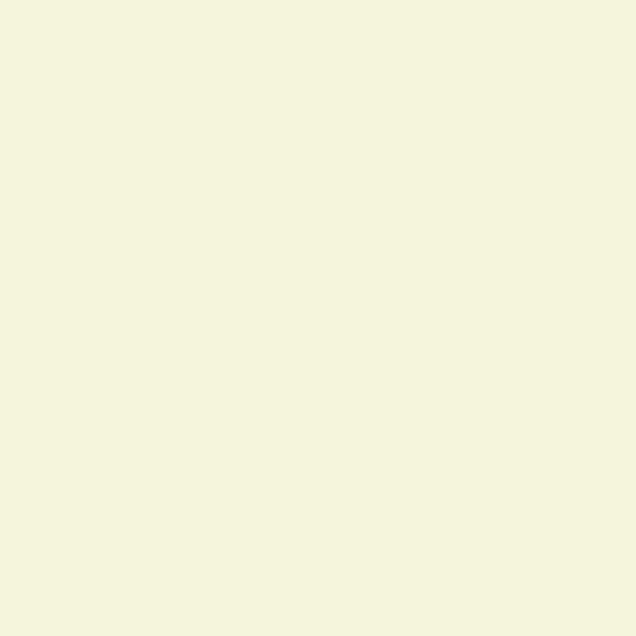

In [19]:
max_level_1_value = mcts.get_max_value_level_1()


fig, ax = p_utils.init_3d_figure(name="Level wise 1")

# nodes = mcts.infeasible_sub_nodes[0]
# nodes = mcts.history_level_1_dict[4]['nodes']
j, nodes = mcts.get_max_value_nodes_level_1()

print("nodes", nodes)
i = 0
for i in range(len(nodes)//2):
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i)+1]]['state'])
    
    grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('grasp_poses')
    if grasp:
        grasp = grasp[0]['grasp']
    else:
        print("Here doesn't have grasp")
        
        mcts.rearr_action.scene_mngr.render_objects(ax)
        p_utils.plot_basis(ax)
        mcts.rearr_action.show()
        break
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    
    gripper_kinematics_info = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_fk()

    gripper_tip_poses = mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose()


    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['leftfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['rightfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['rightfinger']))
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['leftfinger']))

    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

각 node에서 생성한 grasp을 inverse kinematics를 풀어보자 


엄청 쉬워보이는 자세인데 왜 IK 실패를 할까

In [39]:
def show_curernt_scene(q, pose):
    fig, ax = p_utils.init_3d_figure(name="Level wise 1")
    
    mcts.rearr_action.scene_mngr.set_robot_eef_pose(q)
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)
    
    mcts.rearr_action.scene_mngr.set_gripper_pose(pose)
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

In [8]:
total_ = 0
for i in range(6):
    total_ += 6/(i+1)

total_


14.7

In [9]:
mcts.tree.nodes[0]

NameError: name 'mcts' is not defined

여기서 실패가 나는게 말이 안됨..

In [40]:
default_thetas = mcts.rearr_action.scene_mngr.scene.robot.init_qpos

for _, i in enumerate(nodes):
    if _ < 1:
        continue
    if _%2 == 1:
        continue
        
    print("Current state node num : ",i)
    print("Current state is came from last action")
    
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*_-1]]['state'])

    last_action_node = mcts.tree.nodes[nodes[2*_+1]]
    current_state_node = mcts.tree.nodes[i]
    
    print(current_state_node['action']['pre_grasp'])
    pre_grasp_pose = current_state_node['action']['pre_grasp']
    grasp_pose = current_state_node['action']['grasp']
    post_grasp_pose = current_state_node['action']['post_grasp']
    
    pre_release_pose = current_state_node['action']['pre_release']
    release_pose = current_state_node['action']['release']
    post_release_pose = current_state_node['action']['post_release']
    
    obj_release_pose = current_state_node['action']['table']
    # Set Scene
    mcts.rearr_action.scene_mngr.set_robot_eef_pose(default_thetas)
    rearr_obj_name = current_state_node['state'].rearr_obj_name
    rearr_default_pose = current_state_node['state'].rearr_obj_default_pose
    print("rearr_obj_name : ", rearr_obj_name)
    
    mcts.rearr_action.scene_mngr.set_object_pose(rearr_obj_name, rearr_default_pose)

    show_curernt_scene(default_thetas ,pre_grasp_pose)
    print("default 부터 Pre grasp까지 IK 품")
    
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
            default_thetas, pre_grasp_pose, max_iter=100
        )
    
    show_curernt_scene(goal_q, grasp_pose)
    print("pre_grasp 부터 grasp까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, grasp_pose, max_iter=100
    )
    
    show_curernt_scene(goal_q, post_grasp_pose)
    print("grasp 부터 post_grasp까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, post_grasp_pose, max_iter=100
    )
    
    mcts.rearr_action.scene_mngr.set_robot_eef_pose(default_thetas)

    mcts.rearr_action.scene_mngr.set_object_pose(rearr_obj_name, obj_release_pose)

    show_curernt_scene(default_thetas, post_release_pose)
    print("default 부터 post_release까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        default_thetas, pre_release_pose, max_iter=100
    )
    
    show_curernt_scene(goal_q, release_pose)
    print("release 부터 post_release까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, release_pose, max_iter=100
    )
    
    show_curernt_scene(goal_q, post_release_pose)
    print("post_release 부터 post_release까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, release_pose, max_iter=100
    )
    
    break

Current state node num :  10
Current state is came from last action
[[ 1.7347235e-18  3.7369016e-01  9.2755359e-01  2.7714780e-01]
 [-4.5109000e-02  9.2660940e-01 -3.7330979e-01 -1.5398476e-01]
 [-9.9898207e-01 -4.1841015e-02  1.6856790e-02  8.5422677e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


KeyError: 'pre_release'

In [41]:
########## level 1 ##########
if mcts.history_level_2_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    mcts.render_rearr("_", max_value_nodes)

In [68]:
mcts.tree.nodes[172]['action']['rearr_poses'][0][0]

{'release': array([[-0.035319  ,  0.49304995, -0.8692838 ,  0.6695346 ],
        [ 0.02806048, -0.8689943 , -0.49402586,  0.3249112 ],
        [-0.9989821 , -0.04184102,  0.01685679,  0.85591245],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),
 'pre_release': array([[-0.035319  ,  0.49304995, -0.8692838 ,  0.6695346 ],
        [ 0.02806048, -0.8689943 , -0.49402586,  0.3249112 ],
        [-0.9989821 , -0.04184102,  0.01685679,  0.90591246],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),
 'post_release': array([[-0.035319  ,  0.49304995, -0.8692838 ,  0.7129988 ],
        [ 0.02806048, -0.8689943 , -0.49402586,  0.3496125 ],
        [-0.9989821 , -0.04184102,  0.01685679,  0.85506964],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32)}

# Pick action 사용하는 버전 전용 디버깅

nodes [0, 1, 29, 136, 137, 139, 211, 214, 215, 218, 219, 223, 224, 225, 231, 236, 237, 238, 243, 247, 248, 251, 255, 258, 259, 260, 267, 268, 269]
1
136
139
214
218
223
225
236
238
247
251
258
260
268


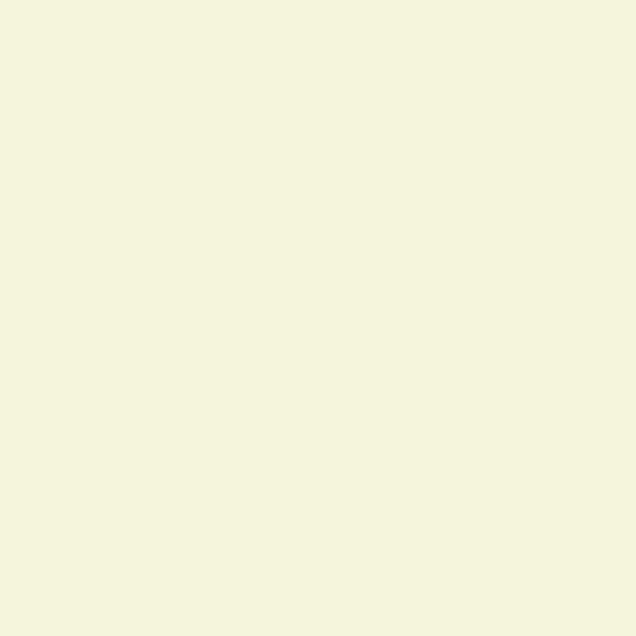

In [10]:
max_level_1_value = mcts.get_max_value_level_1()

fig, ax = p_utils.init_3d_figure(name="Level wise 1")

j, nodes = mcts.get_max_value_nodes_level_1()

print("nodes", nodes)
i = 0
for i in range(len(nodes)//2):
    print(nodes[2*(i)+1])
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i)+1]]['state'])
    
    action_type = mcts.tree.nodes[nodes[2*(i)+1]].get('action').get('type')
    if action_type == 'pick':
        grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('action').get('grasp_poses')
        if grasp:
            grasp = grasp[0]['grasp']
        else:
            print("Here doesn't have grasp")
            mcts.rearr_action.scene_mngr.render_objects(ax)
            p_utils.plot_basis(ax)
            mcts.rearr_action.show()
            break
    if action_type == 'rearr':
        grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('action').get('rearr_poses')[0]
        if grasp:
            grasp = grasp[0].get('release')
        else:
            print("Here doesn't have grasp")

            mcts.rearr_action.scene_mngr.render_objects(ax)
            p_utils.plot_basis(ax)
            mcts.rearr_action.show()
            break
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    
    gripper_kinematics_info = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_fk()

    gripper_tip_poses = mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose()


    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['leftfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['rightfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['rightfinger']))
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['leftfinger']))

    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

In [9]:
max_value_nodes = mcts.get_minimum_cost_node()

## Save path 

In [10]:
final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(max_value_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)
else:
    final_pnp_all_joint_paths.append([])
    final_pick_all_objects.append([])
    final_place_all_object_poses.append([])
    final_optimal_nodes.append([])

In [11]:
final_pnp_all_joint_paths

[[[OrderedDict([('pre_grasp',
                 [array([-2.44913614e-02, -4.93481917e-01, -7.12606699e-03, -2.65921629e+00,
                         -1.12051746e-03,  2.23082305e+00, -6.99662048e-01]),
                  array([-4.89827227e-02, -4.48485654e-01, -1.42521340e-02, -2.62430199e+00,
                         -2.24103493e-03,  2.24053103e+00, -6.13925933e-01]),
                  array([-0.07347408, -0.40348939, -0.0213782 , -2.58938768, -0.00336155,
                          2.25023901, -0.52818982]),
                  array([-0.09796545, -0.35849313, -0.02850427, -2.55447338, -0.00448207,
                          2.25994699, -0.4424537 ]),
                  array([-0.12245681, -0.31349687, -0.03563033, -2.51955907, -0.00560259,
                          2.26965497, -0.35671759]),
                  array([-0.14694817, -0.2685006 , -0.0427564 , -2.48464477, -0.0067231 ,
                          2.27936295, -0.27098147]),
                  array([-0.17143953, -0.22350434, -0.04

In [12]:
for i in max_value_nodes:
    if not mcts.tree.nodes[i]['level1_5']:
        print("Error 1.5", i)
for i in max_value_nodes:
    if not mcts.tree.nodes[i]['level2']:
        print("Error 2", i)
        

Error 1.5 3822


0 scene
100 scene
200 scene
300 scene
400 scene
500 scene
600 scene
700 scene
800 scene
900 scene
1000 scene
1100 scene
1200 scene
1300 scene
Animation Finished..
PWD :  /home/juju/pytamp/examples/doosan/action/rearrangement1/movie_dir
Save finished..


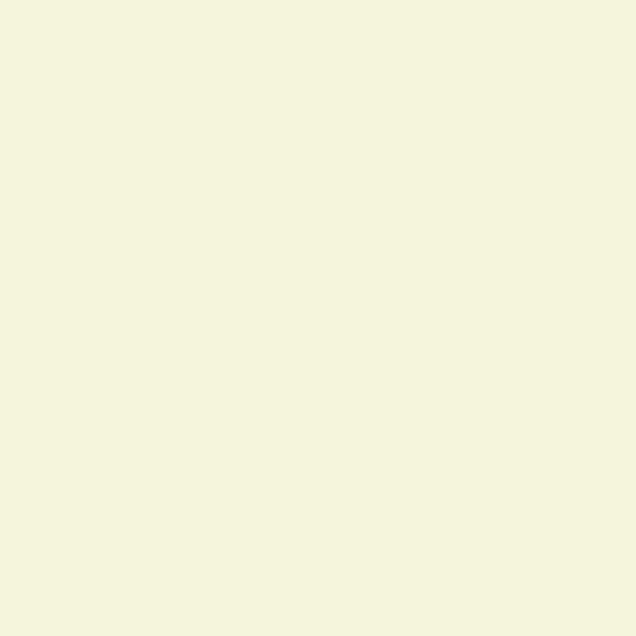

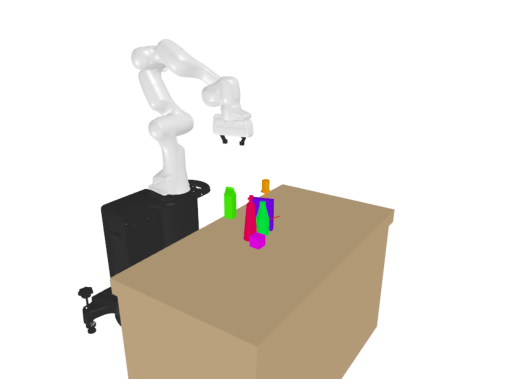

In [13]:
from pykin.utils.kin_utils import apply_robot_to_scene

mcts.rearr_action.scene_mngr.render.render_objects(mcts.tree.nodes[0]['state'].objs)
# pick.scene_mngr.render.trimesh_scene = apply_robot_to_scene(
#         trimesh_scene=pick.scene_mngr.render.trimesh_scene, 
#         robot=pick.scene_mngr.scene.robot,
#         geom="visual"
#             )
# pick.scene_mngr.render.set_camera_view()

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
#     video_name="pick_rearrangement1_only_current_scene",
    video_name="pick_rearrangement1_consider_next_scene_minimum_cost_nodes",
)


In [20]:
count = 0
for i in mcts.tree.nodes:
    if mcts.tree.nodes[i]['visit']>1:
        count += 1
count

24

In [7]:
count = 0
for i in mcts.tree.nodes:
    if mcts.tree.nodes[i]['visit']>1:
        count += 1
count

17

In [30]:
for i in raz

{'depth': 1,
 'state': <pytamp.scene.scene.Scene at 0x7fda17004a00>,
 'action': {'type': 'pick',
  'pick_obj_name': 'can0',
  'grasp_poses': [{'grasp': array([[ 0.        ,  0.59427848,  0.80425934,  0.38289493],
           [ 0.00525198,  0.80424825, -0.59427028, -0.17083556],
           [-0.99998621,  0.00422396, -0.00312114,  0.86611772],
           [ 0.        ,  0.        ,  0.        ,  1.        ]]),
    'pre_grasp': array([[ 0.        ,  0.59427845,  0.80425936,  0.30246902],
           [ 0.00525198,  0.8042483 , -0.5942703 , -0.11140853],
           [-0.99998623,  0.00422396, -0.00312114,  0.8664298 ],
           [ 0.        ,  0.        ,  0.        ,  1.        ]],
          dtype=float32),
    'post_grasp': array([[ 0.        ,  0.59427845,  0.80425936,  0.38289493],
           [ 0.00525198,  0.8042483 , -0.5942703 , -0.17083555],
           [-0.99998623,  0.00422396, -0.00312114,  0.96611774],
           [ 0.        ,  0.        ,  0.        ,  1.        ]],
          dtype

In [28]:
nodes = [0, 3, 10, 172, 173, 175, 180, 388, 389, 392, 591, 592, 593, 594, 598, 601, 602, 604, 607, 609, 610]

In [33]:
for i in nodes:
    print(mcts.tree.nodes[i]["level2"])

True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False



# Level 1에서 무조건 좋아질 조합 찾고 Path 계산해도 Cost가 무조건 좋아져야하는데 안됨. 

분석  : 이미 성공한 list에서 cost 계산


In [62]:
mcts.get_best_node()

[0, 1, 82, 84, 88, 94, 1254, 1256, 1473, 1476, 1478]

In [63]:
max_value_nodes

[0, 4, 205, 206, 706, 709, 1608, 1610, 1614, 1618, 1619]

In [20]:
def get_minimum_cost_node():
    min_cost = 100
    min_cost_nodes = []
    for i, n in mcts.history_level_2_dict.items():
        cost = 0
        print(i,n)
        for n_num in n['nodes']:
            cost += mcts.tree.nodes[n_num].get('cost')
        if min_cost > cost:
            min_cost = cost
            min_cost_nodes = n['nodes']
    return min_cost_nodes
        

In [21]:
get_minimum_cost_node()

0 {'nodes': [0, 7, 446, 449, 644, 645, 650, 654, 656, 661, 662, 664, 668, 669, 674, 678, 679, 682, 684], 'value': 8.053283}
1 {'nodes': [0, 7, 446, 449, 644, 647, 802, 804, 808, 812, 814, 818, 819, 822, 823, 825, 828, 832, 833, 837, 838], 'value': 8.525124}
2 {'nodes': [0, 7, 446, 449, 644, 648, 839, 843, 845, 846, 849], 'value': 14.897667}
3 {'nodes': [0, 7, 446, 449, 644, 648, 839, 841, 1193, 1194, 1196], 'value': 14.938767}
4 {'nodes': [0, 7, 446, 450, 452, 454, 1487, 1490, 1492], 'value': 14.938767}


[0, 7, 446, 450, 452, 454, 1487, 1490, 1492]